In [2]:
import sys 
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd as autograd
#sys.path.append(os.path.abspath("/mnt/home/yjo10/ceph/CAMELS/ST_DMO/MINE/"))
import matplotlib.pyplot as plt
import seaborn as sns
import pywph as pw
from scipy import stats
sys.path.append(os.path.abspath("/mnt/home/yjo10/ceph/myutils/"))
from wph_utils import WPH
sns.set()

## Density Maps

In [5]:
fmaps = \
        "/mnt/home/fvillaescusa/CAMELS/PUBLIC_RELEASE/CMD/2D_maps/data/Maps_Mtot_IllustrisTNG_LH_z=0.00.npy"
# read the data
tng_maps = np.load(fmaps)
fmaps = \
        "/mnt/home/fvillaescusa/CAMELS/PUBLIC_RELEASE/CMD/2D_maps/data/Maps_Mtot_SIMBA_LH_z=0.00.npy"
# read the data
simba_maps = np.load(fmaps)

### Sanity check

In [65]:
sum_tng=tng_maps.sum(axis=2).sum(axis=1)
sum_simba=simba_maps.sum(axis=2).sum(axis=1)

In [66]:
total_simba = np.zeros((1000,))
for i in range(15):
    total_simba += sum_simba[i::15]
total_tng = np.zeros((1000,))
for i in range(15):
    total_tng += sum_tng[i::15]

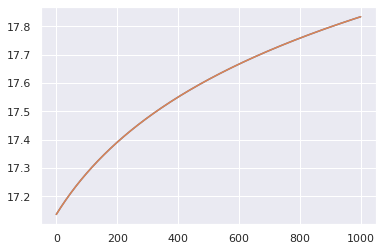

In [81]:
om_tng = np.argsort(tparams[:,0])
om_simba = np.argsort(sparams[:,0])
plt.plot(range(1000),np.log10(total_simba[om_simba]))
plt.plot(range(1000),np.log10(total_tng[om_tng]))

In [9]:
fparams = '/mnt/home/fvillaescusa/CAMELS/PUBLIC_RELEASE/CMD/2D_maps/data/params_IllustrisTNG.txt'
# read the dat
tparams = np.loadtxt(fparams)
fparams = '/mnt/home/fvillaescusa/CAMELS/PUBLIC_RELEASE/CMD/2D_maps/data/params_SIMBA.txt'
# read the dat
sparams = np.loadtxt(fparams)

### Plots for maps

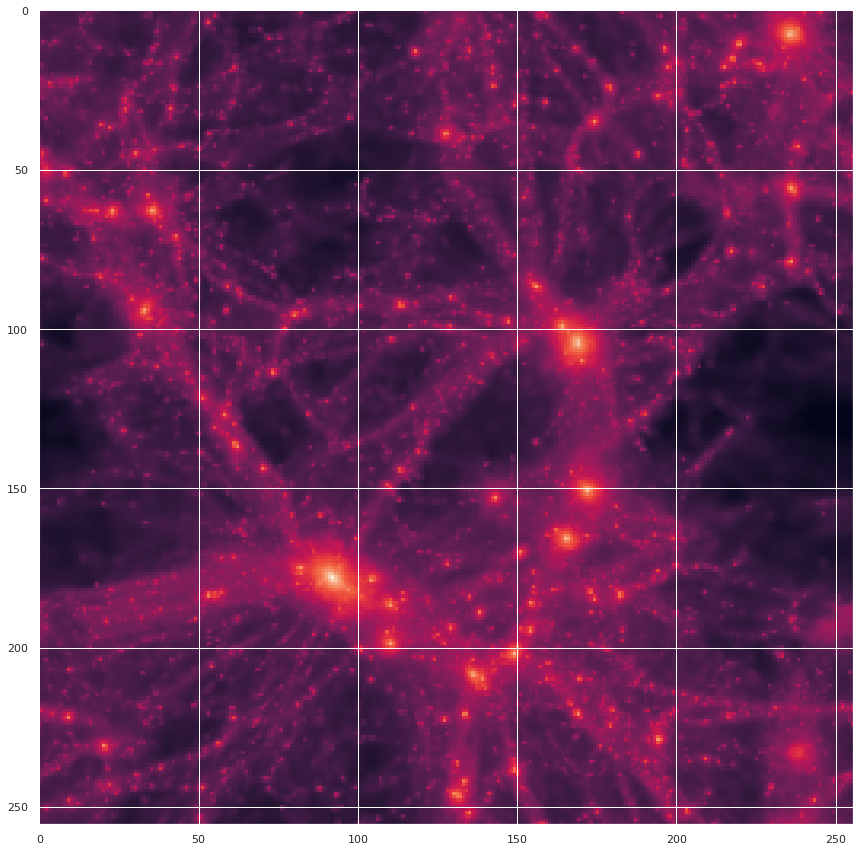

In [5]:
plt.figure(figsize=(15,15))
plt.imshow(np.log10(tng_maps[0,:]))

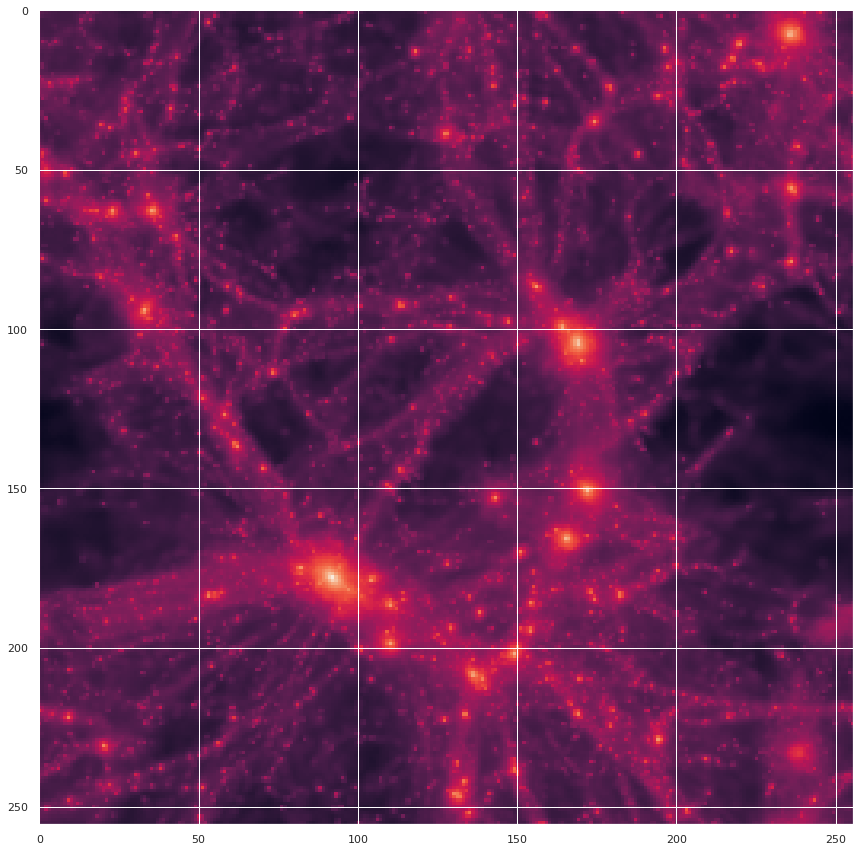

In [215]:
plt.figure(figsize=(15,15))
plt.imshow(ntng_maps[0,:])

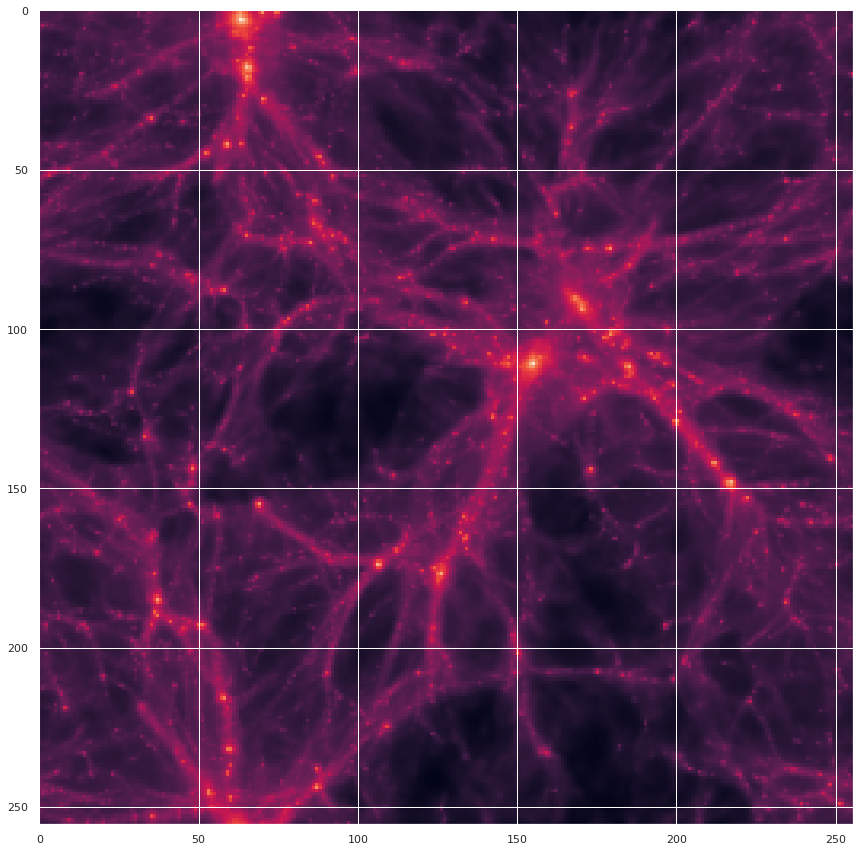

In [6]:
plt.figure(figsize=(15,15))
plt.imshow(np.log10(simba_maps[0,:]))

## Phase Harmonics Scattering Transform

In [6]:
sys.path.append(os.path.abspath("/mnt/home/yjo10/ceph/myutils/"))
from imp import reload 
from wph_utils import WPH
import wph_utils
# Change in mymodule/'
reload(wph_utils)
import plt_utils
from plt_utils import generateAxesForMultiplePlots
import plt_utils
import scipy
# Change in mymodule/'
reload(plt_utils)

<module 'plt_utils' from '/mnt/home/yjo10/ceph/myutils/plt_utils.py'>

In [7]:
J = 7; L = 4; dn = 0

wph_tng   = WPH(np.log(tng_maps), shape=(256, 256), J=J, L=L, dn=dn,device=0,batch=True)
tng_coefs   = np.load("/mnt/home/yjo10/ceph/CAMELS/ST_DMO/coefficients/WPH_nIlustrisTNG_LH_J_{}_L_{}_dn_{}.npy".format(J,L,dn),
                       allow_pickle=True).item()
simba_coefs = np.load("/mnt/home/yjo10/ceph/CAMELS/ST_DMO/coefficients/WPH_nSIMBA_LH_J_{}_L_{}_dn_{}.npy".format(J,L,dn),
                       allow_pickle=True).item()

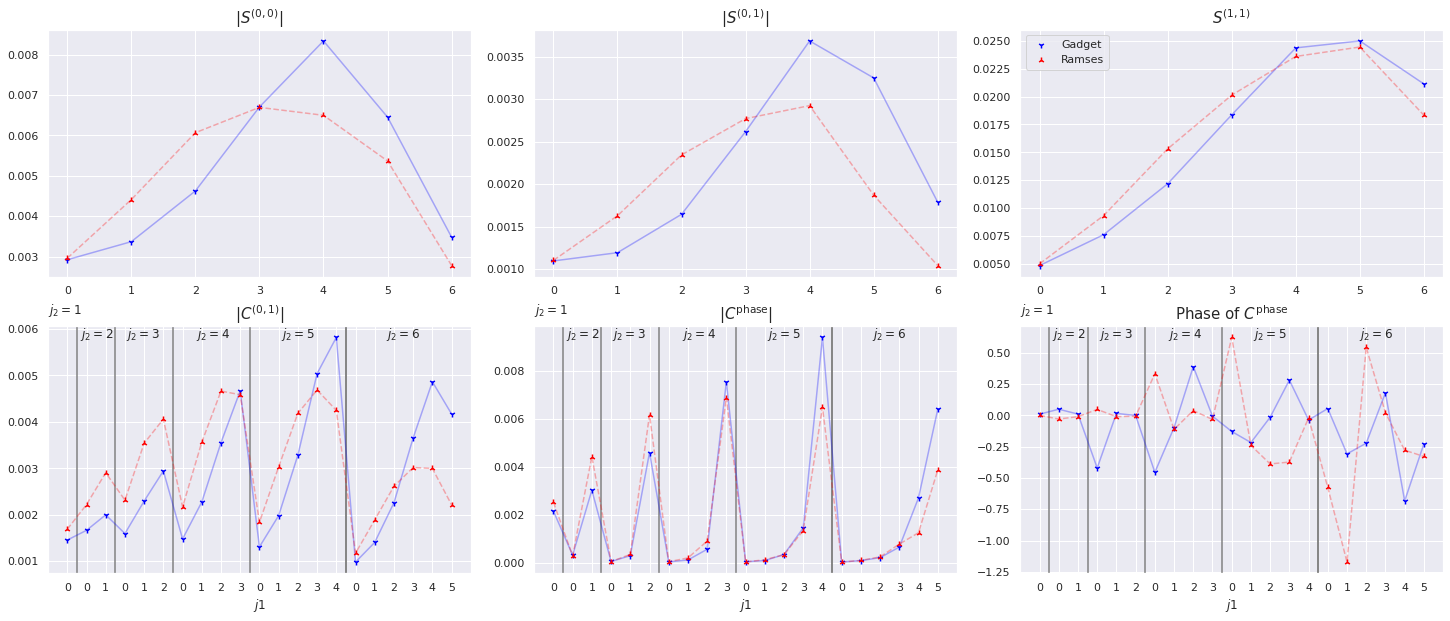

In [22]:
axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(25,10),wspace=0.15,hspace=0.2)
param=0
n = 0
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = 'Times'
zorder = 10; alpha=0.3
titles = ["$|S^{(0,0)}|$","$|S^{(0,1)}|$","$S^{(1,1)}$","$|C^{(0,1)}|$","$|C^\mathrm{phase}|$","Phase of $C^\mathrm{phase}$"]
for i, name in enumerate(wph_tng.getCoefNames()+["Cphase"]):
    x = i % 3; y = i // 3
    # TNG
    if x == 2 and y == 1:
        X = np.angle(tng_coefs[name][n*15:n*15+15,:]).mean(axis=0)
    else:
        X = np.absolute(tng_coefs[name][n*15:n*15+15,:]).mean(axis=0)
    axes[x,y].plot(range(X.shape[0]),X,c="blue",ls="-",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(range(X.shape[0]),X,c="blue",marker='1',zorder=zorder, label="Gadget")
    # SIMBA
    if x == 2 and y == 1:
        X = np.angle(simba_coefs[name][n*15:n*15+15,:]).mean(axis=0)
    else:
        X = np.absolute(simba_coefs[name][n*15:n*15+15,:]).mean(axis=0)
    axes[x,y].plot(range(X.shape[0]),X,c="red",ls="--",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(range(X.shape[0]),X,c="red",marker='2',zorder=zorder, label="Ramses")
    axes[x,y].set_title(titles[i], fontsize=15)
axes[2,0].legend()


for i in range(3):
    j1  = [0.5, 2.5, 5.5, 9.5, 14.5,14.5]
    j2  = list(range(1,7))
    pos = [[0.0,1.1],[0.075,1.00],[0.185,1.00],
           [0.35,1.00],[0.55,1.00],[0.8,1.00]];
    for j, jj in enumerate(j1):
        axes[i,1].axvline(x=jj,c="grey",zorder=1)
        axes[i,1].text(*pos[j],"$j_2=${}".format(j2[j]),transform=axes[i,1].transAxes,
                       verticalalignment='top', horizontalalignment='left')
    axes[i,1].set_xticks(list(range(X.shape[0])))
    axes[i,1].set_xticklabels([0,0,1,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5])
    axes[i,1].set_xlabel("$j1$")   
#plt.savefig("linear_correlation.png",dpi=400)

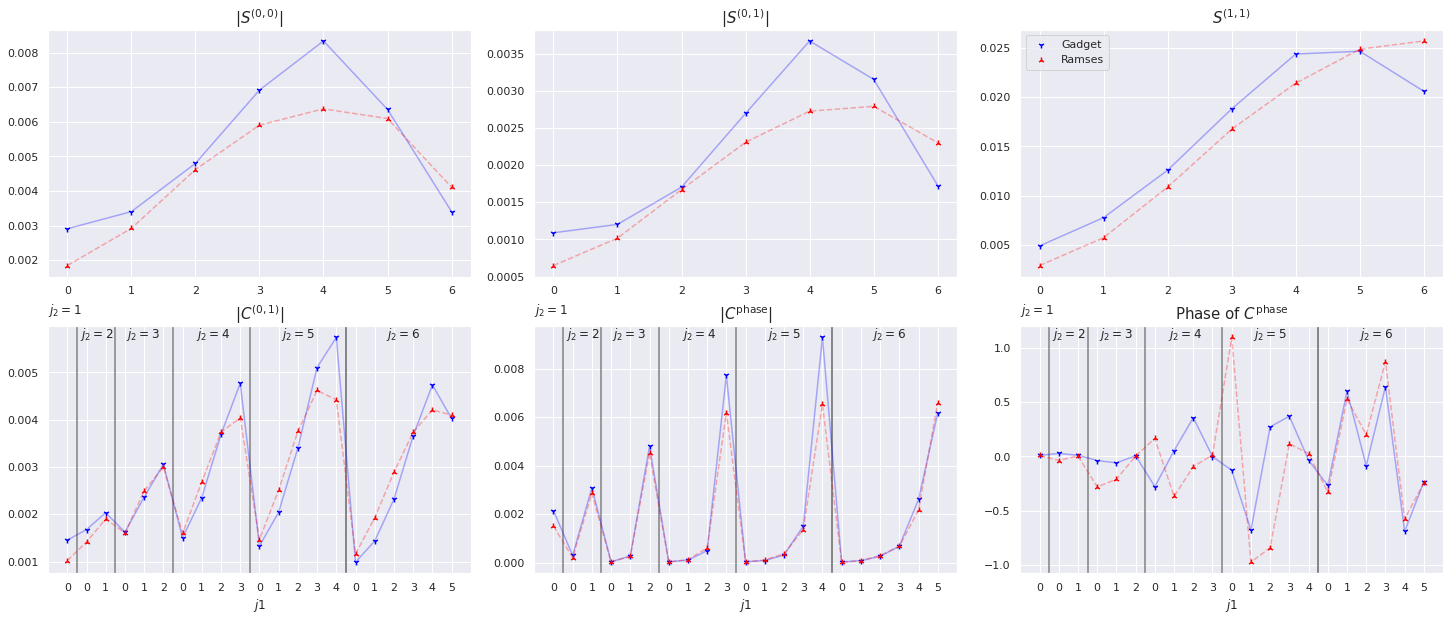

In [23]:
axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(25,10),wspace=0.15,hspace=0.2)
param=0
n = 1
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = 'Times'
zorder = 10; alpha=0.3
titles = ["$|S^{(0,0)}|$","$|S^{(0,1)}|$","$S^{(1,1)}$","$|C^{(0,1)}|$","$|C^\mathrm{phase}|$","Phase of $C^\mathrm{phase}$"]
for i, name in enumerate(wph_tng.getCoefNames()+["Cphase"]):
    x = i % 3; y = i // 3
    # TNG
    if x == 2 and y == 1:
        X = np.angle(tng_coefs[name][n*15:n*15+15,:]).mean(axis=0)
    else:
        X = np.absolute(tng_coefs[name][n*15:n*15+15,:]).mean(axis=0)
    axes[x,y].plot(range(X.shape[0]),X,c="blue",ls="-",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(range(X.shape[0]),X,c="blue",marker='1',zorder=zorder, label="Gadget")
    # SIMBA
    if x == 2 and y == 1:
        X = np.angle(simba_coefs[name][n*15:n*15+15,:]).mean(axis=0)
    else:
        X = np.absolute(simba_coefs[name][n*15:n*15+15,:]).mean(axis=0)
    axes[x,y].plot(range(X.shape[0]),X,c="red",ls="--",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(range(X.shape[0]),X,c="red",marker='2',zorder=zorder, label="Ramses")
    axes[x,y].set_title(titles[i], fontsize=15)
axes[2,0].legend()


for i in range(3):
    j1  = [0.5, 2.5, 5.5, 9.5, 14.5,14.5]
    j2  = list(range(1,7))
    pos = [[0.0,1.1],[0.075,1.00],[0.185,1.00],
           [0.35,1.00],[0.55,1.00],[0.8,1.00]];
    for j, jj in enumerate(j1):
        axes[i,1].axvline(x=jj,c="grey",zorder=1)
        axes[i,1].text(*pos[j],"$j_2=${}".format(j2[j]),transform=axes[i,1].transAxes,
                       verticalalignment='top', horizontalalignment='left')
    axes[i,1].set_xticks(list(range(X.shape[0])))
    axes[i,1].set_xticklabels([0,0,1,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5])
    axes[i,1].set_xlabel("$j1$")   
#plt.savefig("linear_correlation.png",dpi=400)

### Residual

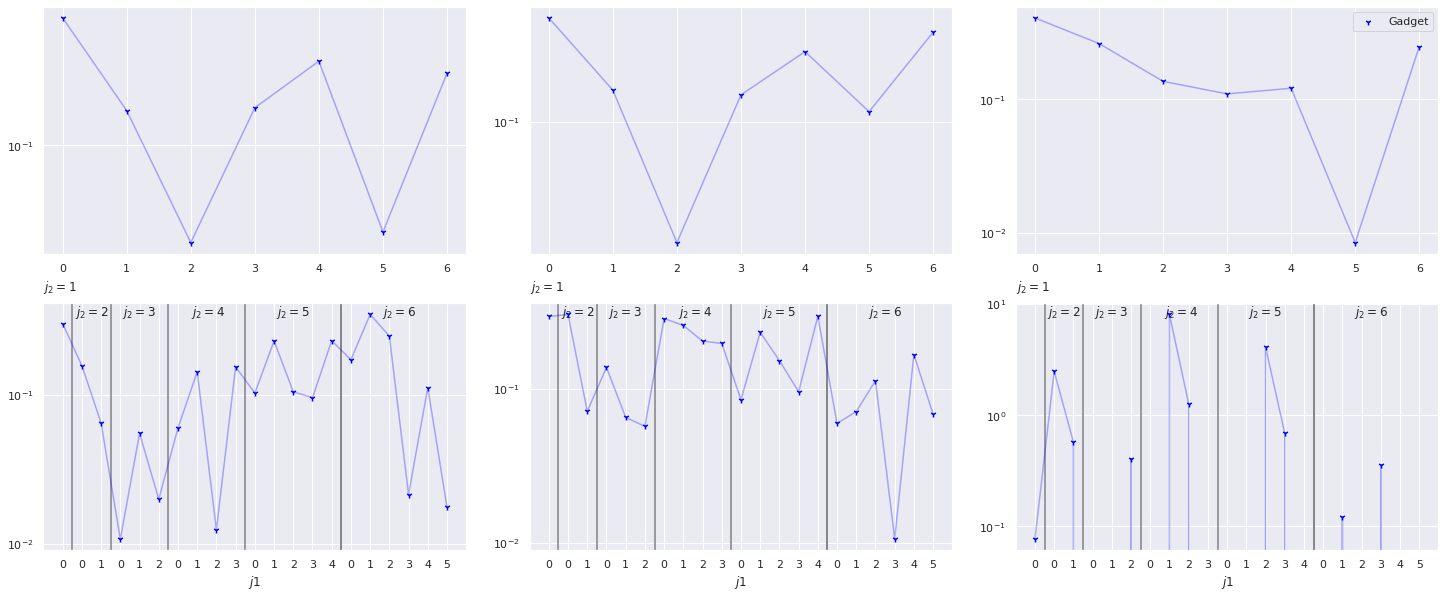

In [9]:
axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(25,10),wspace=0.15,hspace=0.2)
param=0
n = 1
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = 'Times'
zorder = 10; alpha=0.3
titles = ["$|S^{(0,0)}|$","$|S^{(0,1)}|$","$S^{(1,1)}$","$|C^{(0,1)}|$","$|C^\mathrm{phase}|$","Phase of $C^\mathrm{phase}$"]
for i, name in enumerate(wph_tng.getCoefNames()+["Cphase"]):
    x = i % 3; y = i // 3
    # TNG
    if x == 2 and y == 1:
        t = np.angle(tng_coefs[name][n*15:n*15+15,:]).mean(axis=0)
        s = np.angle(simba_coefs[name][n*15:n*15+15,:]).mean(axis=0)
        X = np.abs(t-s)/t
    else:
        t = np.absolute(tng_coefs[name][n*15:n*15+15,:]).mean(axis=0)
        s = np.absolute(simba_coefs[name][n*15:n*15+15,:]).mean(axis=0)
        X = np.abs(t-s)/t
    axes[x,y].plot(range(X.shape[0]),X,c="blue",ls="-",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(range(X.shape[0]),X,c="blue",marker='1',zorder=zorder, label="Gadget")
    axes[x,y].set_yscale("log")
axes[2,0].legend()


for i in range(3):
    j1  = [0.5, 2.5, 5.5, 9.5, 14.5,14.5]
    j2  = list(range(1,7))
    pos = [[0.0,1.1],[0.075,1.00],[0.185,1.00],
           [0.35,1.00],[0.55,1.00],[0.8,1.00]];
    for j, jj in enumerate(j1):
        axes[i,1].axvline(x=jj,c="grey",zorder=1)
        axes[i,1].text(*pos[j],"$j_2=${}".format(j2[j]),transform=axes[i,1].transAxes,
                       verticalalignment='top', horizontalalignment='left')
    axes[i,1].set_xticks(list(range(X.shape[0])))
    axes[i,1].set_xticklabels([0,0,1,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5])
    axes[i,1].set_xlabel("$j1$")   
#plt.savefig("linear_correlation.png",dpi=400)

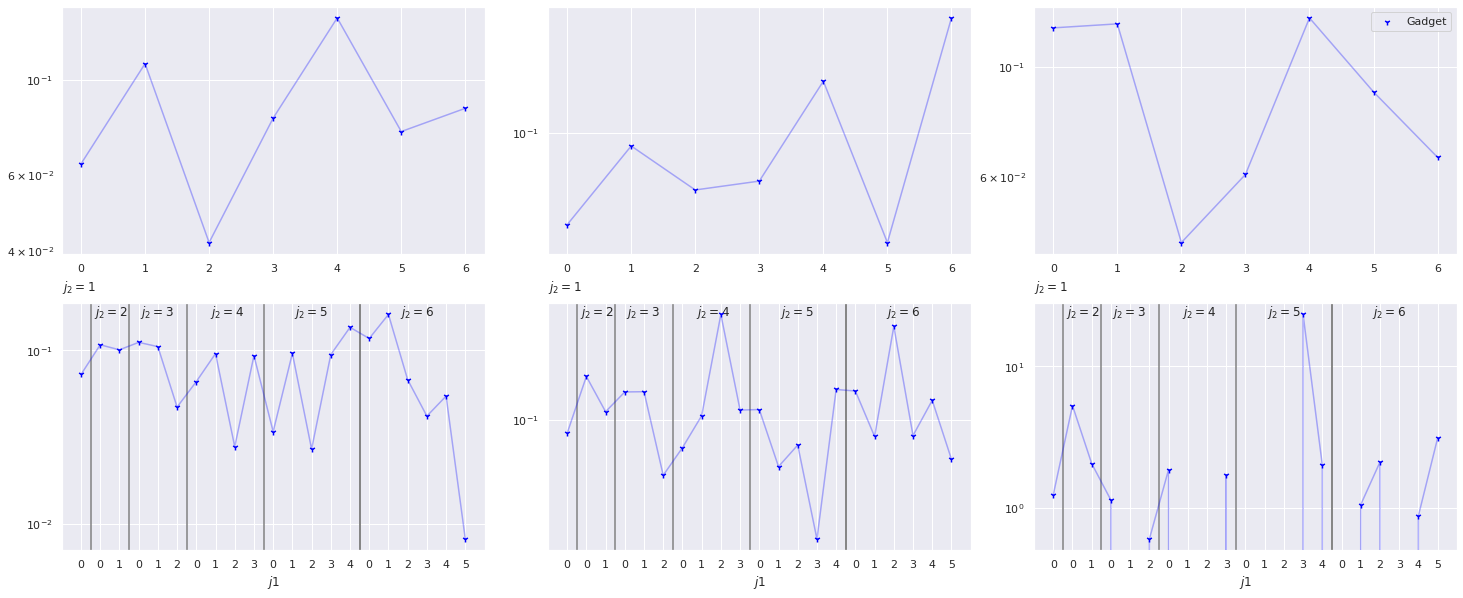

In [15]:
axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(25,10),wspace=0.15,hspace=0.2)
param=1
n = 100
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = 'Times'
zorder = 10; alpha=0.3
titles = ["$|S^{(0,0)}|$","$|S^{(0,1)}|$","$S^{(1,1)}$","$|C^{(0,1)}|$","$|C^\mathrm{phase}|$","Phase of $C^\mathrm{phase}$"]
for i, name in enumerate(wph_tng.getCoefNames()+["Cphase"]):
    x = i % 3; y = i // 3
    # TNG
    if x == 2 and y == 1:
        t = np.angle(tng_coefs[name][n*15:n*15+15,:]).mean(axis=0)
        s = np.angle(simba_coefs[name][n*15:n*15+15,:]).mean(axis=0)
        X = np.abs(t-s)/t
    else:
        t = np.absolute(tng_coefs[name][n*15:n*15+15,:]).mean(axis=0)
        s = np.absolute(simba_coefs[name][n*15:n*15+15,:]).mean(axis=0)
        X = np.abs(t-s)/t
    axes[x,y].plot(range(X.shape[0]),X,c="blue",ls="-",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(range(X.shape[0]),X,c="blue",marker='1',zorder=zorder, label="Gadget")
    axes[x,y].set_yscale("log")
axes[2,0].legend()


for i in range(3):
    j1  = [0.5, 2.5, 5.5, 9.5, 14.5,14.5]
    j2  = list(range(1,7))
    pos = [[0.0,1.1],[0.075,1.00],[0.185,1.00],
           [0.35,1.00],[0.55,1.00],[0.8,1.00]];
    for j, jj in enumerate(j1):
        axes[i,1].axvline(x=jj,c="grey",zorder=1)
        axes[i,1].text(*pos[j],"$j_2=${}".format(j2[j]),transform=axes[i,1].transAxes,
                       verticalalignment='top', horizontalalignment='left')
    axes[i,1].set_xticks(list(range(X.shape[0])))
    axes[i,1].set_xticklabels([0,0,1,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5])
    axes[i,1].set_xlabel("$j1$")   
#plt.savefig("linear_correlation.png",dpi=400)

### Linear Correlation

In [30]:
J = 7; L = 4; dn = 0
wph_tng   = WPH(np.log(tng_maps), shape=(256, 256), J=J, L=L, dn=dn,device=0,batch=True)
wph_simba = WPH(np.log(simba_maps),shape=(256, 256), J=J, L=L, dn=dn,device=0,batch=True)
tng_coefs   = wph_tng.batchGetAllIsoCoeffs()
simba_coefs = wph_simba.batchGetAllIsoCoeffs()
np.save("coefficients/WPH_IllustrisTNG_LH_J_{}_L_{}_dn_{}".format(J,L,dn),tng_coefs)
np.save("coefficients/WPH_SIMBA_LH_J_{}_L_{}_dn_{}".format(J,L,dn),simba_coefs)

In [34]:
def getLinearCoef(coef,param):
    r = []
    for i in range(coef.shape[1]):
        r.append(scipy.stats.pearsonr(coef[:,i], param)[0])
    return np.array(r)

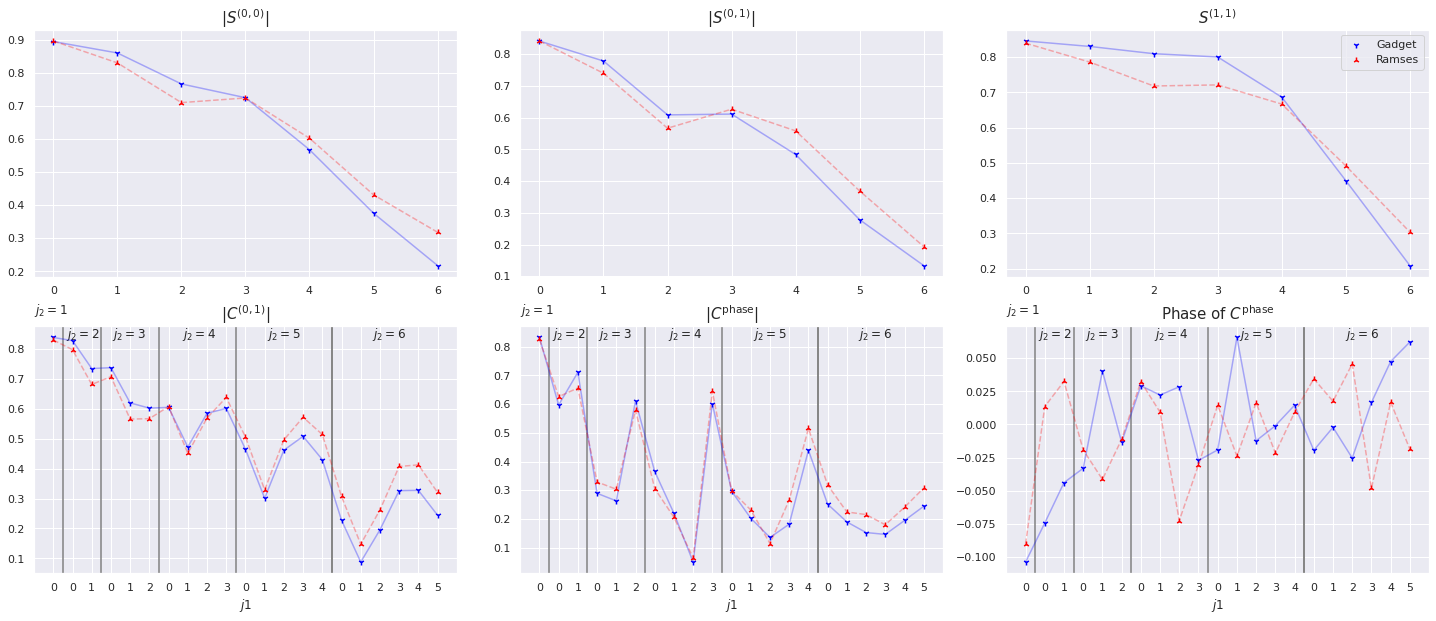

In [35]:
axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(25,10),wspace=0.15,hspace=0.2)
param=0
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = 'Times'
zorder = 10; alpha=0.3
titles = ["$|S^{(0,0)}|$","$|S^{(0,1)}|$","$S^{(1,1)}$","$|C^{(0,1)}|$","$|C^\mathrm{phase}|$","Phase of $C^\mathrm{phase}$"]
for i, name in enumerate(wph_tng.getCoefNames()+["Cphase"]):
    x = i % 3; y = i // 3
    # TNG
    if x == 2 and y == 1:
        X = np.angle(tng_coefs[name][::15])
    else:
        X = np.absolute(tng_coefs[name][::15])
    r = getLinearCoef(X,tparams[:,param])
    axes[x,y].plot(range(X.shape[1]),r,c="blue",ls="-",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(range(X.shape[1]),r,c="blue",marker='1',zorder=zorder, label="Gadget")
    # SIMBA
    if x == 2 and y == 1:
        X = np.angle(simba_coefs[name][::15])
    else:
        X = np.absolute(simba_coefs[name][::15])
    r = getLinearCoef(X,sparams[:,param])
    axes[x,y].plot(range(X.shape[1]),r,c="red",ls="--",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(range(X.shape[1]),r,c="red",marker='2',zorder=zorder, label="Ramses")
    axes[x,y].set_title(titles[i], fontsize=15)
axes[2,0].legend()


for i in range(3):
    j1  = [0.5, 2.5, 5.5, 9.5, 14.5,14.5]
    j2  = list(range(1,7))
    pos = [[0.0,1.1],[0.075,1.00],[0.185,1.00],
           [0.35,1.00],[0.55,1.00],[0.8,1.00]];
    for j, jj in enumerate(j1):
        axes[i,1].axvline(x=jj,c="grey",zorder=1)
        axes[i,1].text(*pos[j],"$j_2=${}".format(j2[j]),transform=axes[i,1].transAxes,
                       verticalalignment='top', horizontalalignment='left')
    axes[i,1].set_xticks(list(range(X.shape[1])))
    axes[i,1].set_xticklabels([0,0,1,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5])
    axes[i,1].set_xlabel("$j1$")   
#plt.savefig("linear_correlation.png",dpi=400)

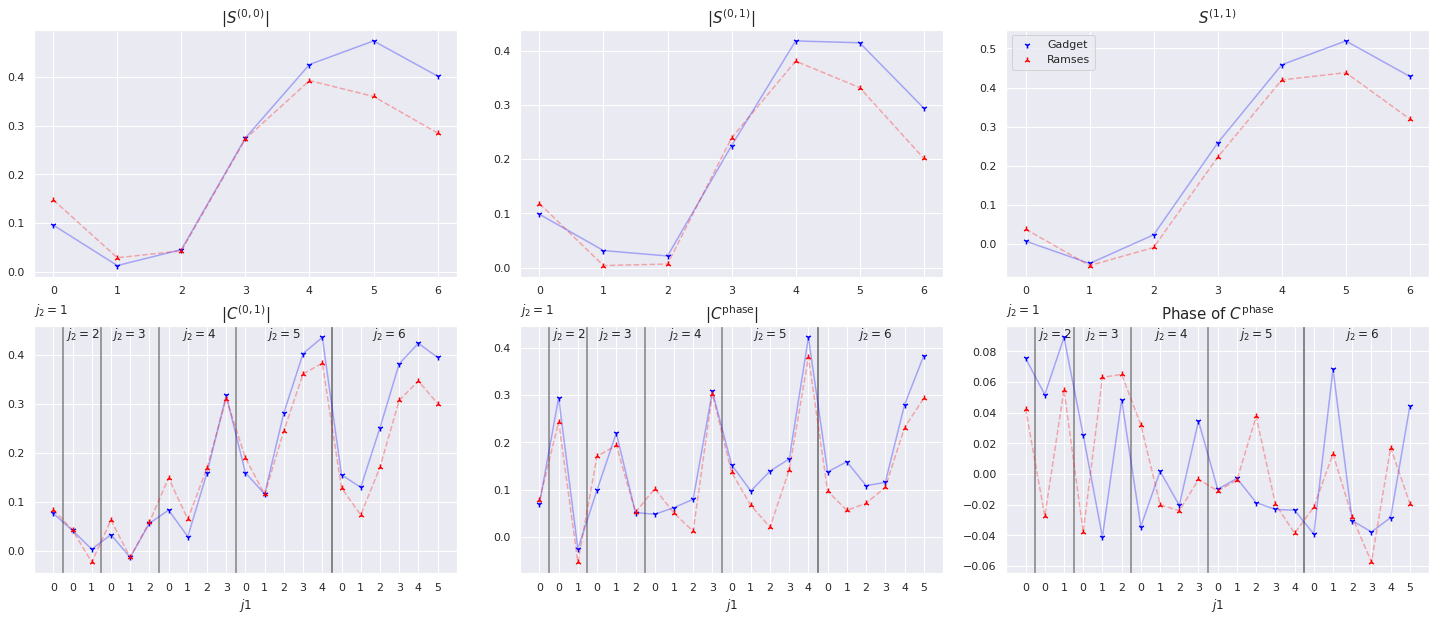

In [ ]:
axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(25,10),wspace=0.15,hspace=0.2)
param=1
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = 'Times'
zorder = 10; alpha=0.3
titles = ["$|S^{(0,0)}|$","$|S^{(0,1)}|$","$S^{(1,1)}$","$|C^{(0,1)}|$","$|C^\mathrm{phase}|$","Phase of $C^\mathrm{phase}$"]
for i, name in enumerate(wph_tng.getCoefNames()+["Cphase"]):
    x = i % 3; y = i // 3
    # TNG
    if x == 2 and y == 1:
        X = np.angle(tng_coefs[name][::15])
    else:
        X = np.absolute(tng_coefs[name][::15])
    r = getLinearCoef(X,tparams[:,param])
    axes[x,y].plot(range(X.shape[1]),r,c="blue",ls="-",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(range(X.shape[1]),r,c="blue",marker='1',zorder=zorder, label="Gadget")
    # SIMBA
    if x == 2 and y == 1:
        X = np.angle(simba_coefs[name][::15])
    else:
        X = np.absolute(simba_coefs[name][::15])
    r = getLinearCoef(X,sparams[:,param])
    axes[x,y].plot(range(X.shape[1]),r,c="red",ls="--",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(range(X.shape[1]),r,c="red",marker='2',zorder=zorder, label="Ramses")
    axes[x,y].set_title(titles[i], fontsize=15)
axes[2,0].legend()


for i in range(3):
    j1  = [0.5, 2.5, 5.5, 9.5, 14.5,14.5]
    j2  = list(range(1,7))
    pos = [[0.0,1.1],[0.075,1.00],[0.185,1.00],
           [0.35,1.00],[0.55,1.00],[0.8,1.00]];
    for j, jj in enumerate(j1):
        axes[i,1].axvline(x=jj,c="grey",zorder=1)
        axes[i,1].text(*pos[j],"$j_2=${}".format(j2[j]),transform=axes[i,1].transAxes,
                       verticalalignment='top', horizontalalignment='left')
    axes[i,1].set_xticks(list(range(X.shape[1])))
    axes[i,1].set_xticklabels([0,0,1,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5])
    axes[i,1].set_xlabel("$j1$")   
#plt.savefig("linear_correlation.png",dpi=400)

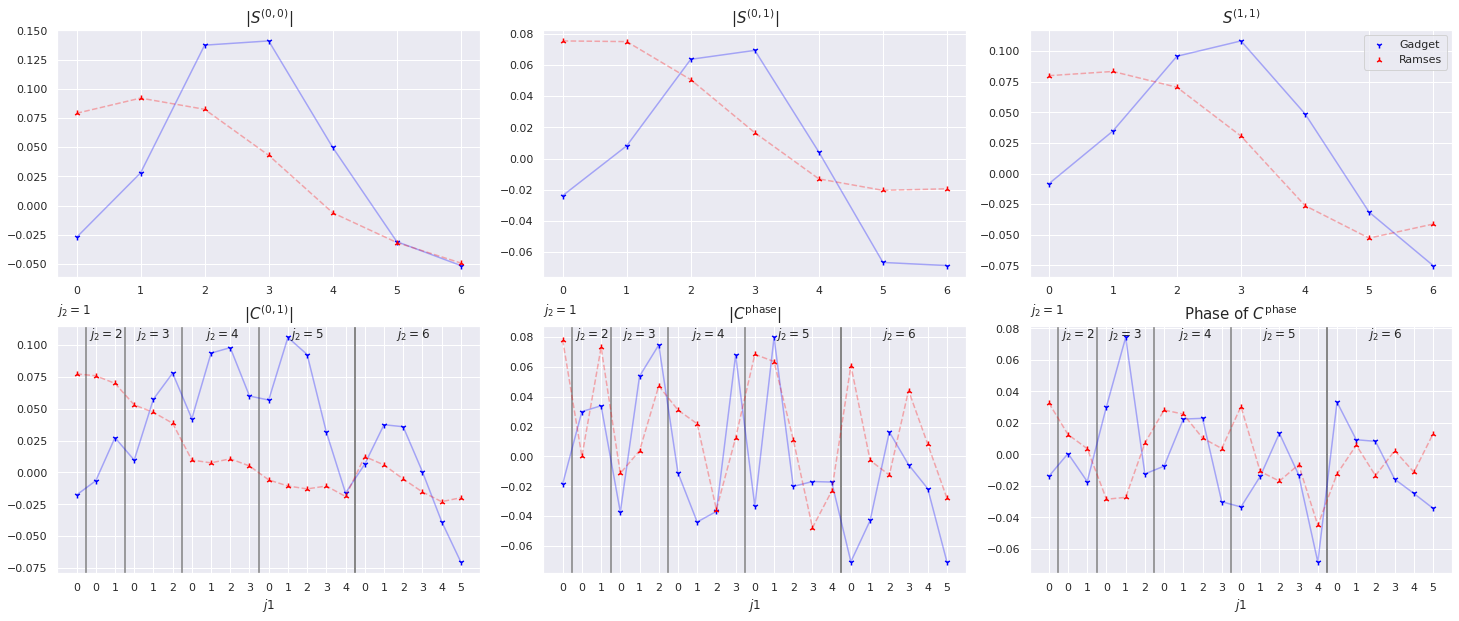

In [45]:
axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(25,10),wspace=0.15,hspace=0.2)
param=2
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = 'Times'
zorder = 10; alpha=0.3
titles = ["$|S^{(0,0)}|$","$|S^{(0,1)}|$","$S^{(1,1)}$","$|C^{(0,1)}|$","$|C^\mathrm{phase}|$","Phase of $C^\mathrm{phase}$"]
for i, name in enumerate(wph_tng.getCoefNames()+["Cphase"]):
    x = i % 3; y = i // 3
    # TNG
    if x == 2 and y == 1:
        X = np.angle(tng_coefs[name][::15])
    else:
        X = np.absolute(tng_coefs[name][::15])
    r = getLinearCoef(X,tparams[:,param])
    axes[x,y].plot(range(X.shape[1]),r,c="blue",ls="-",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(range(X.shape[1]),r,c="blue",marker='1',zorder=zorder, label="Gadget")
    # SIMBA
    if x == 2 and y == 1:
        X = np.angle(simba_coefs[name][::15])
    else:
        X = np.absolute(simba_coefs[name][::15])
    r = getLinearCoef(X,sparams[:,param])
    axes[x,y].plot(range(X.shape[1]),r,c="red",ls="--",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(range(X.shape[1]),r,c="red",marker='2',zorder=zorder, label="Ramses")
    axes[x,y].set_title(titles[i], fontsize=15)
axes[2,0].legend()


for i in range(3):
    j1  = [0.5, 2.5, 5.5, 9.5, 14.5,14.5]
    j2  = list(range(1,7))
    pos = [[0.0,1.1],[0.075,1.00],[0.185,1.00],
           [0.35,1.00],[0.55,1.00],[0.8,1.00]];
    for j, jj in enumerate(j1):
        axes[i,1].axvline(x=jj,c="grey",zorder=1)
        axes[i,1].text(*pos[j],"$j_2=${}".format(j2[j]),transform=axes[i,1].transAxes,
                       verticalalignment='top', horizontalalignment='left')
    axes[i,1].set_xticks(list(range(X.shape[1])))
    axes[i,1].set_xticklabels([0,0,1,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5])
    axes[i,1].set_xlabel("$j1$")   
#plt.savefig("linear_correlation.png",dpi=400)

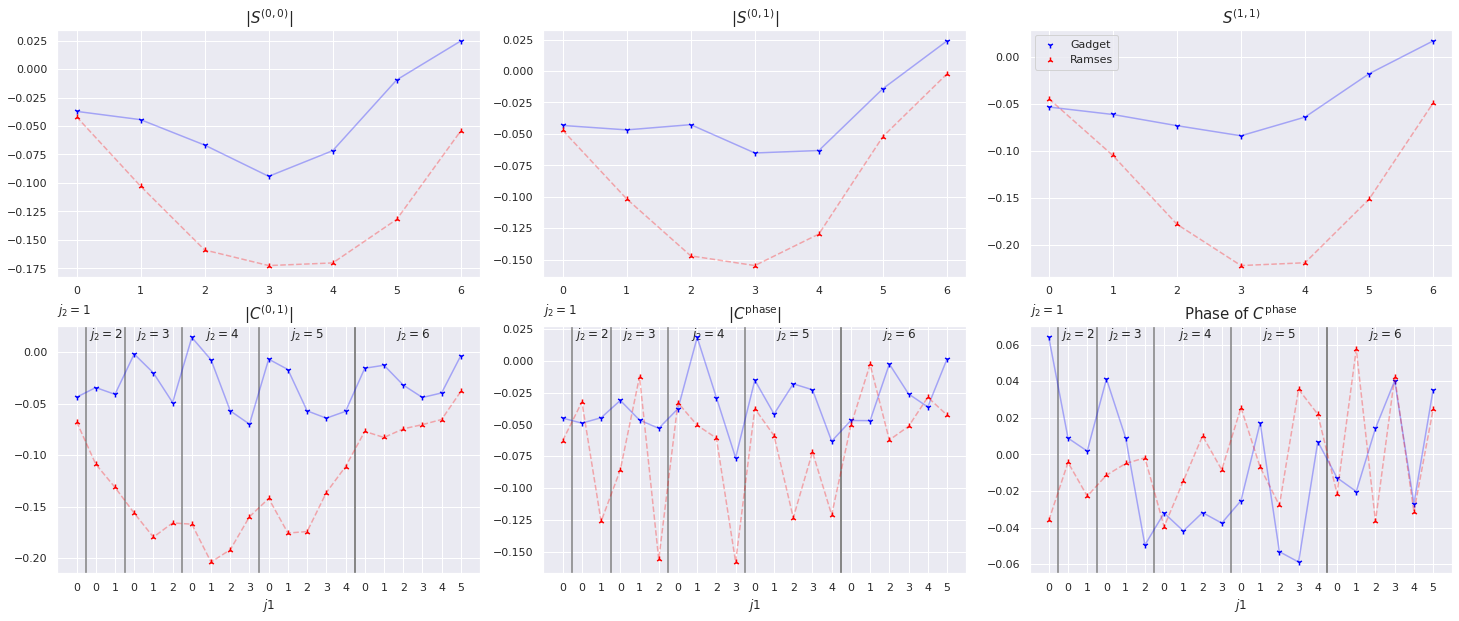

In [44]:
axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(25,10),wspace=0.15,hspace=0.2)
param=5
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = 'Times'
zorder = 10; alpha=0.3
titles = ["$|S^{(0,0)}|$","$|S^{(0,1)}|$","$S^{(1,1)}$","$|C^{(0,1)}|$","$|C^\mathrm{phase}|$","Phase of $C^\mathrm{phase}$"]
for i, name in enumerate(wph_tng.getCoefNames()+["Cphase"]):
    x = i % 3; y = i // 3
    # TNG
    if x == 2 and y == 1:
        X = np.angle(tng_coefs[name][::15])
    else:
        X = np.absolute(tng_coefs[name][::15])
    r = getLinearCoef(X,tparams[:,param])
    axes[x,y].plot(range(X.shape[1]),r,c="blue",ls="-",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(range(X.shape[1]),r,c="blue",marker='1',zorder=zorder, label="Gadget")
    # SIMBA
    if x == 2 and y == 1:
        X = np.angle(simba_coefs[name][::15])
    else:
        X = np.absolute(simba_coefs[name][::15])
    r = getLinearCoef(X,sparams[:,param])
    axes[x,y].plot(range(X.shape[1]),r,c="red",ls="--",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(range(X.shape[1]),r,c="red",marker='2',zorder=zorder, label="Ramses")
    axes[x,y].set_title(titles[i], fontsize=15)
axes[2,0].legend()


for i in range(3):
    j1  = [0.5, 2.5, 5.5, 9.5, 14.5,14.5]
    j2  = list(range(1,7))
    pos = [[0.0,1.1],[0.075,1.00],[0.185,1.00],
           [0.35,1.00],[0.55,1.00],[0.8,1.00]];
    for j, jj in enumerate(j1):
        axes[i,1].axvline(x=jj,c="grey",zorder=1)
        axes[i,1].text(*pos[j],"$j_2=${}".format(j2[j]),transform=axes[i,1].transAxes,
                       verticalalignment='top', horizontalalignment='left')
    axes[i,1].set_xticks(list(range(X.shape[1])))
    axes[i,1].set_xticklabels([0,0,1,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5])
    axes[i,1].set_xlabel("$j1$")   
#plt.savefig("linear_correlation.png",dpi=400)

### Normalized Maps

In [39]:
J = 7; L = 4; dn = 0
ntng_maps = np.log(tng_maps).reshape(tng_maps.shape[0],-1)
ntng_maps = (ntng_maps.T - ntng_maps.mean(axis=1))/ntng_maps.std(axis=1)
ntng_maps = ntng_maps.T.reshape(15000,256,256)
nsimba_maps = np.log(simba_maps).reshape(tng_maps.shape[0],-1)
nsimba_maps = (nsimba_maps.T - nsimba_maps.mean(axis=1))/nsimba_maps.std(axis=1)
nsimba_maps = nsimba_maps.T.reshape(15000,256,256)

wph_tng   = WPH(ntng_maps, shape=(256, 256), J=J, L=L, dn=dn,device=0,batch=True)
wph_simba = WPH(nsimba_maps,shape=(256, 256), J=J, L=L, dn=dn,device=0,batch=True)
ntng_coefs   = wph_tng.batchGetAllIsoCoeffs()
nsimba_coefs = wph_simba.batchGetAllIsoCoeffs()
#np.save("coefficients/WPH_nIllustrisTNG_LH_J_{}_L_{}_dn_{}".format(J,L,dn),ntng_coefs)
#np.save("coefficients/WPH_nSIMBA_LH_J_{}_L_{}_dn_{}".format(J,L,dn),nsimba_coefs)

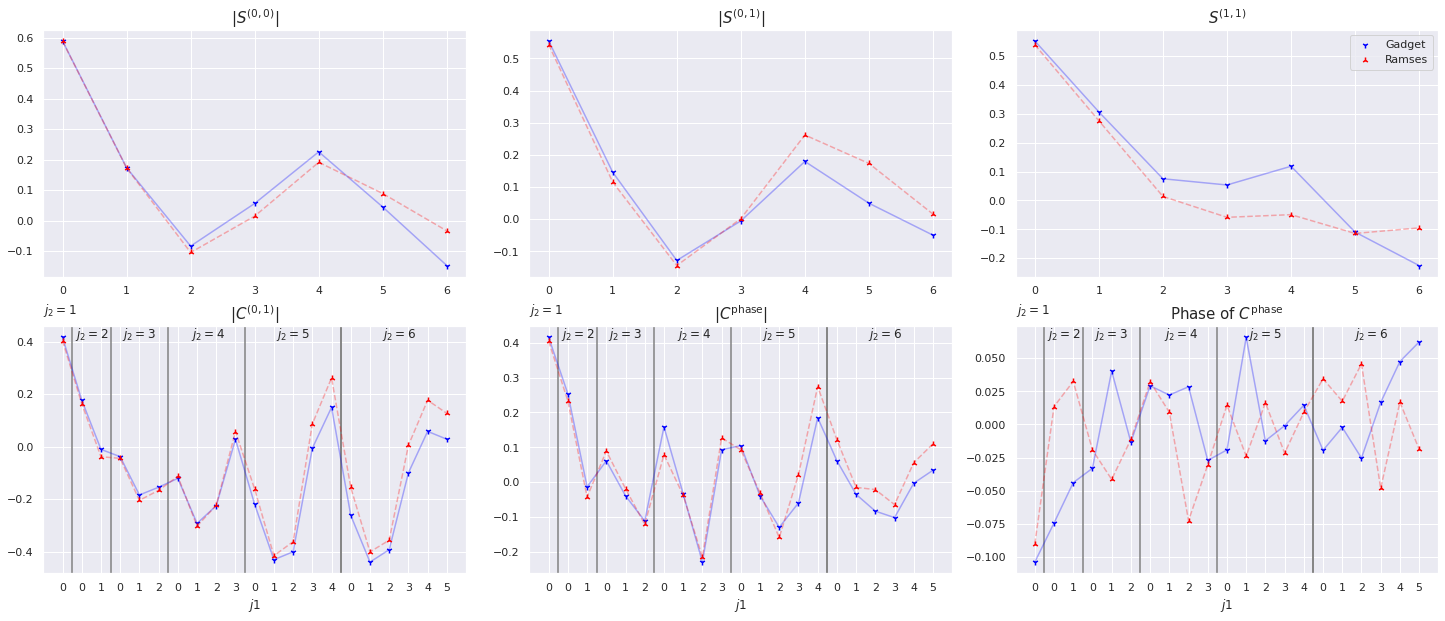

In [40]:
axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(25,10),wspace=0.15,hspace=0.2)
param=0
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = 'Times'
zorder = 10; alpha=0.3
titles = ["$|S^{(0,0)}|$","$|S^{(0,1)}|$","$S^{(1,1)}$","$|C^{(0,1)}|$","$|C^\mathrm{phase}|$","Phase of $C^\mathrm{phase}$"]
for i, name in enumerate(wph_tng.getCoefNames()+["Cphase"]):
    x = i % 3; y = i // 3
    # TNG
    if x == 2 and y == 1:
        X = np.angle(ntng_coefs[name][::15])
    else:
        X = np.absolute(ntng_coefs[name][::15])
    r = getLinearCoef(X,tparams[:,param])
    axes[x,y].plot(range(X.shape[1]),r,c="blue",ls="-",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(range(X.shape[1]),r,c="blue",marker='1',zorder=zorder, label="Gadget")
    # SIMBA
    if x == 2 and y == 1:
        X = np.angle(nsimba_coefs[name][::15])
    else:
        X = np.absolute(nsimba_coefs[name][::15])
    r = getLinearCoef(X,sparams[:,param])
    axes[x,y].plot(range(X.shape[1]),r,c="red",ls="--",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(range(X.shape[1]),r,c="red",marker='2',zorder=zorder, label="Ramses")
    axes[x,y].set_title(titles[i], fontsize=15)
axes[2,0].legend()


for i in range(3):
    j1  = [0.5, 2.5, 5.5, 9.5, 14.5,14.5]
    j2  = list(range(1,7))
    pos = [[0.0,1.1],[0.075,1.00],[0.185,1.00],
           [0.35,1.00],[0.55,1.00],[0.8,1.00]];
    for j, jj in enumerate(j1):
        axes[i,1].axvline(x=jj,c="grey",zorder=1)
        axes[i,1].text(*pos[j],"$j_2=${}".format(j2[j]),transform=axes[i,1].transAxes,
                       verticalalignment='top', horizontalalignment='left')
    axes[i,1].set_xticks(list(range(X.shape[1])))
    axes[i,1].set_xticklabels([0,0,1,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5])
    axes[i,1].set_xlabel("$j1$")   
#plt.savefig("linear_correlation.png",dpi=400)

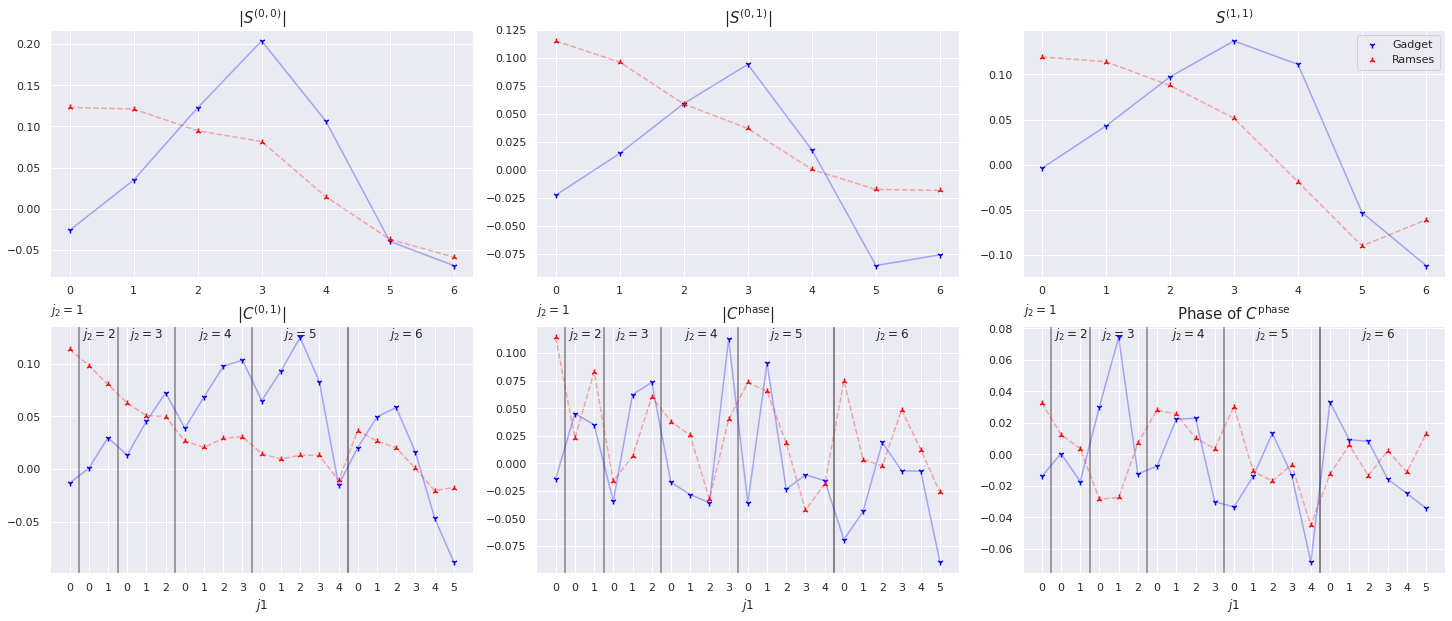

In [46]:
axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(25,10),wspace=0.15,hspace=0.2)
param=2
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = 'Times'
zorder = 10; alpha=0.3
titles = ["$|S^{(0,0)}|$","$|S^{(0,1)}|$","$S^{(1,1)}$","$|C^{(0,1)}|$","$|C^\mathrm{phase}|$","Phase of $C^\mathrm{phase}$"]
for i, name in enumerate(wph_tng.getCoefNames()+["Cphase"]):
    x = i % 3; y = i // 3
    # TNG
    if x == 2 and y == 1:
        X = np.angle(ntng_coefs[name][::15])
    else:
        X = np.absolute(ntng_coefs[name][::15])
    r = getLinearCoef(X,tparams[:,param])
    axes[x,y].plot(range(X.shape[1]),r,c="blue",ls="-",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(range(X.shape[1]),r,c="blue",marker='1',zorder=zorder, label="Gadget")
    # SIMBA
    if x == 2 and y == 1:
        X = np.angle(nsimba_coefs[name][::15])
    else:
        X = np.absolute(nsimba_coefs[name][::15])
    r = getLinearCoef(X,sparams[:,param])
    axes[x,y].plot(range(X.shape[1]),r,c="red",ls="--",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(range(X.shape[1]),r,c="red",marker='2',zorder=zorder, label="Ramses")
    axes[x,y].set_title(titles[i], fontsize=15)
axes[2,0].legend()


for i in range(3):
    j1  = [0.5, 2.5, 5.5, 9.5, 14.5,14.5]
    j2  = list(range(1,7))
    pos = [[0.0,1.1],[0.075,1.00],[0.185,1.00],
           [0.35,1.00],[0.55,1.00],[0.8,1.00]];
    for j, jj in enumerate(j1):
        axes[i,1].axvline(x=jj,c="grey",zorder=1)
        axes[i,1].text(*pos[j],"$j_2=${}".format(j2[j]),transform=axes[i,1].transAxes,
                       verticalalignment='top', horizontalalignment='left')
    axes[i,1].set_xticks(list(range(X.shape[1])))
    axes[i,1].set_xticklabels([0,0,1,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5])
    axes[i,1].set_xlabel("$j1$")   
#plt.savefig("linear_correlation.png",dpi=400)

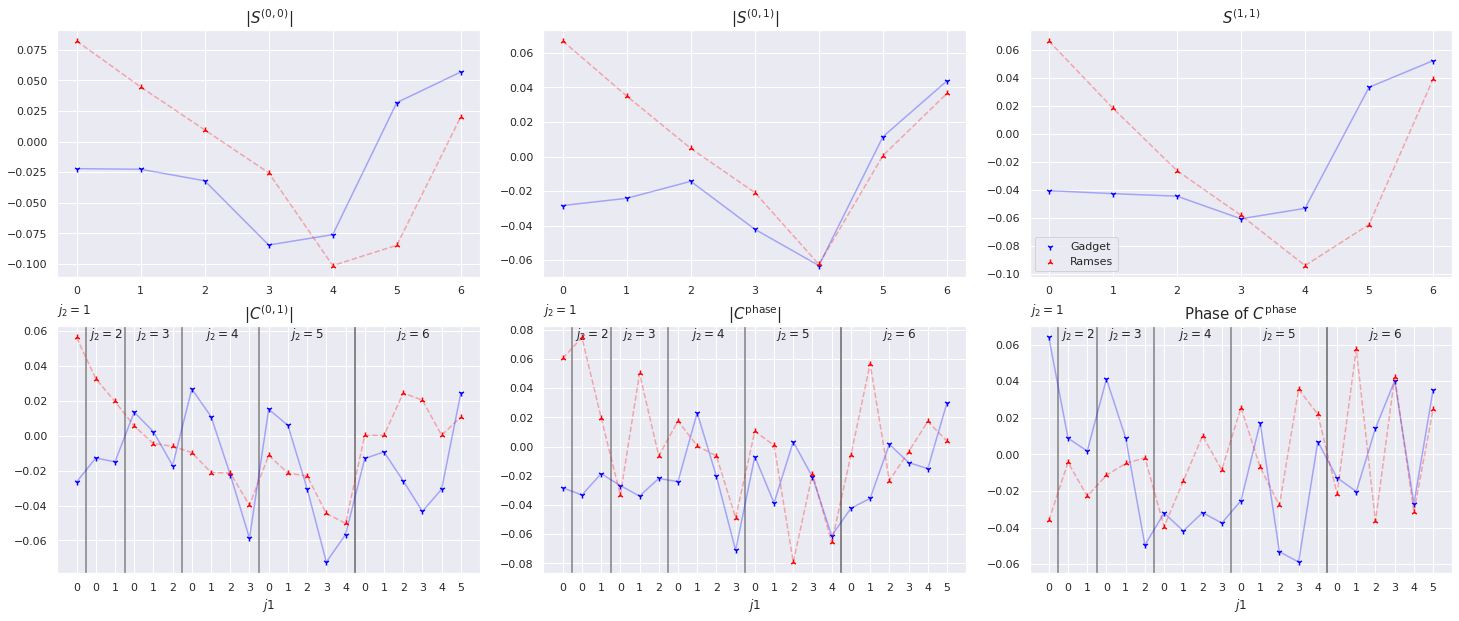

In [41]:
axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(25,10),wspace=0.15,hspace=0.2)
param=5
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = 'Times'
zorder = 10; alpha=0.3
titles = ["$|S^{(0,0)}|$","$|S^{(0,1)}|$","$S^{(1,1)}$","$|C^{(0,1)}|$","$|C^\mathrm{phase}|$","Phase of $C^\mathrm{phase}$"]
for i, name in enumerate(wph_tng.getCoefNames()+["Cphase"]):
    x = i % 3; y = i // 3
    # TNG
    if x == 2 and y == 1:
        X = np.angle(ntng_coefs[name][::15])
    else:
        X = np.absolute(ntng_coefs[name][::15])
    r = getLinearCoef(X,tparams[:,param])
    axes[x,y].plot(range(X.shape[1]),r,c="blue",ls="-",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(range(X.shape[1]),r,c="blue",marker='1',zorder=zorder, label="Gadget")
    # SIMBA
    if x == 2 and y == 1:
        X = np.angle(nsimba_coefs[name][::15])
    else:
        X = np.absolute(nsimba_coefs[name][::15])
    r = getLinearCoef(X,sparams[:,param])
    axes[x,y].plot(range(X.shape[1]),r,c="red",ls="--",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(range(X.shape[1]),r,c="red",marker='2',zorder=zorder, label="Ramses")
    axes[x,y].set_title(titles[i], fontsize=15)
axes[2,0].legend()


for i in range(3):
    j1  = [0.5, 2.5, 5.5, 9.5, 14.5,14.5]
    j2  = list(range(1,7))
    pos = [[0.0,1.1],[0.075,1.00],[0.185,1.00],
           [0.35,1.00],[0.55,1.00],[0.8,1.00]];
    for j, jj in enumerate(j1):
        axes[i,1].axvline(x=jj,c="grey",zorder=1)
        axes[i,1].text(*pos[j],"$j_2=${}".format(j2[j]),transform=axes[i,1].transAxes,
                       verticalalignment='top', horizontalalignment='left')
    axes[i,1].set_xticks(list(range(X.shape[1])))
    axes[i,1].set_xticklabels([0,0,1,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5])
    axes[i,1].set_xlabel("$j1$")   
#plt.savefig("linear_correlation.png",dpi=400)

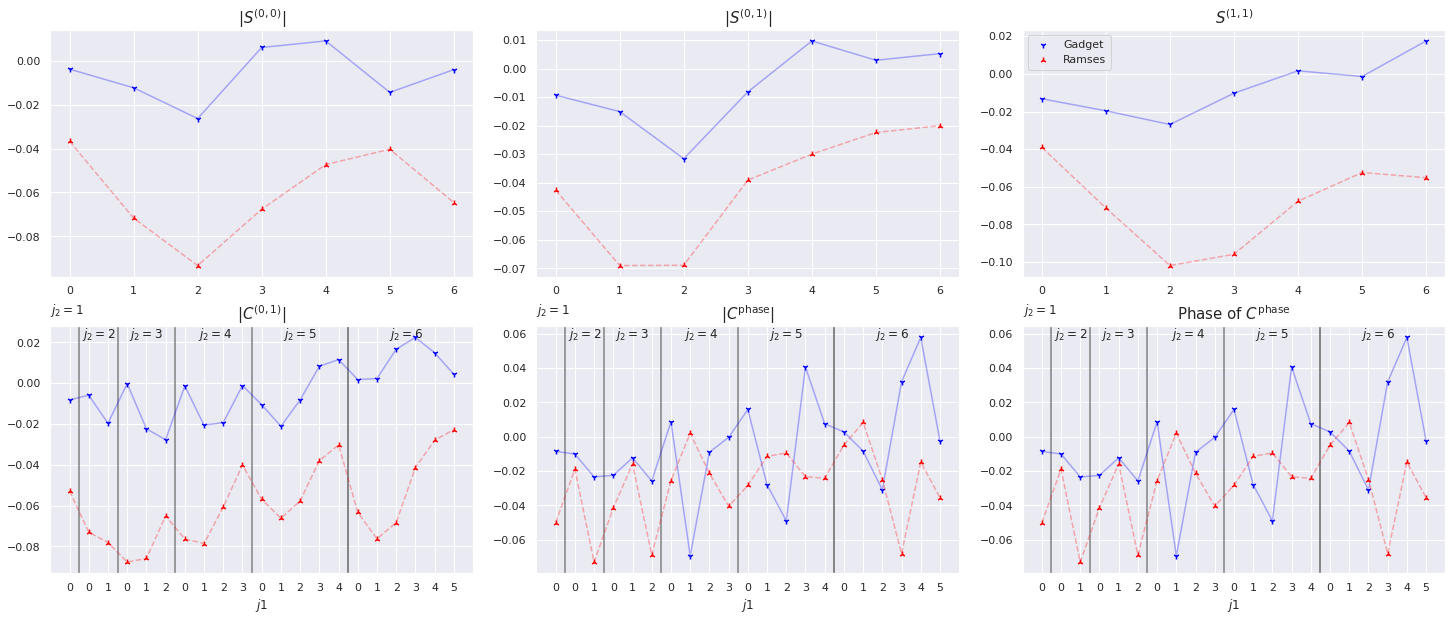

In [42]:
axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(25,10),wspace=0.15,hspace=0.2)
param=3
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = 'Times'
zorder = 10; alpha=0.3
titles = ["$|S^{(0,0)}|$","$|S^{(0,1)}|$","$S^{(1,1)}$","$|C^{(0,1)}|$","$|C^\mathrm{phase}|$",]
for i, name in enumerate(wph_tng.getCoefNames()):
    x = i % 3; y = i // 3
    # TNG
    X = np.absolute(tng_coefs[name][2::15])
    r = getLinearCoef(X,tparams[:,param])
    axes[x,y].plot(range(X.shape[1]),r,c="blue",ls="-",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(range(X.shape[1]),r,c="blue",marker='1',zorder=zorder, label="Gadget")
    # SIMBA
    X = np.absolute(simba_coefs[name][2::15])
    r = getLinearCoef(X,sparams[:,param])
    axes[x,y].plot(range(X.shape[1]),r,c="red",ls="--",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(range(X.shape[1]),r,c="red",marker='2',zorder=zorder, label="Ramses")
    axes[x,y].set_title(titles[i], fontsize=15)
axes[2,0].legend()
## Phase (angle of complex)
x=2;y=1;
# TNG
X = np.absolute(tng_coefs[name][2::15])
r = getLinearCoef(X,tparams[:,param])
axes[x,y].plot(range(X.shape[1]),r,c="blue",ls="-",alpha=alpha,zorder=zorder)
axes[x,y].scatter(range(X.shape[1]),r,c="blue",marker='1',zorder=zorder)
# SIMBA
X = np.absolute(simba_coefs[name][2::15])
r = getLinearCoef(X,sparams[:,param])
axes[x,y].plot(range(X.shape[1]),r,c="red",ls="--",alpha=alpha,zorder=zorder)
axes[x,y].scatter(range(X.shape[1]),r,c="red",marker='2',zorder=zorder)
axes[x,y].set_title("Phase of $C^\mathrm{phase}$", fontsize=15)

for i in range(3):
    j1  = [0.5, 2.5, 5.5, 9.5, 14.5,14.5]
    j2  = list(range(1,7))
    pos = [[0.0,1.1],[0.075,1.00],[0.185,1.00],
           [0.35,1.00],[0.55,1.00],[0.8,1.00]];
    for j, jj in enumerate(j1):
        axes[i,1].axvline(x=jj,c="grey",zorder=1)
        axes[i,1].text(*pos[j],"$j_2=${}".format(j2[j]),transform=axes[i,1].transAxes,
                       verticalalignment='top', horizontalalignment='left')
    axes[i,1].set_xticks(list(range(X.shape[1])))
    axes[i,1].set_xticklabels([0,0,1,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5])
    axes[i,1].set_xlabel("$j1$")   
#plt.savefig("linear_correlation.png",dpi=400)

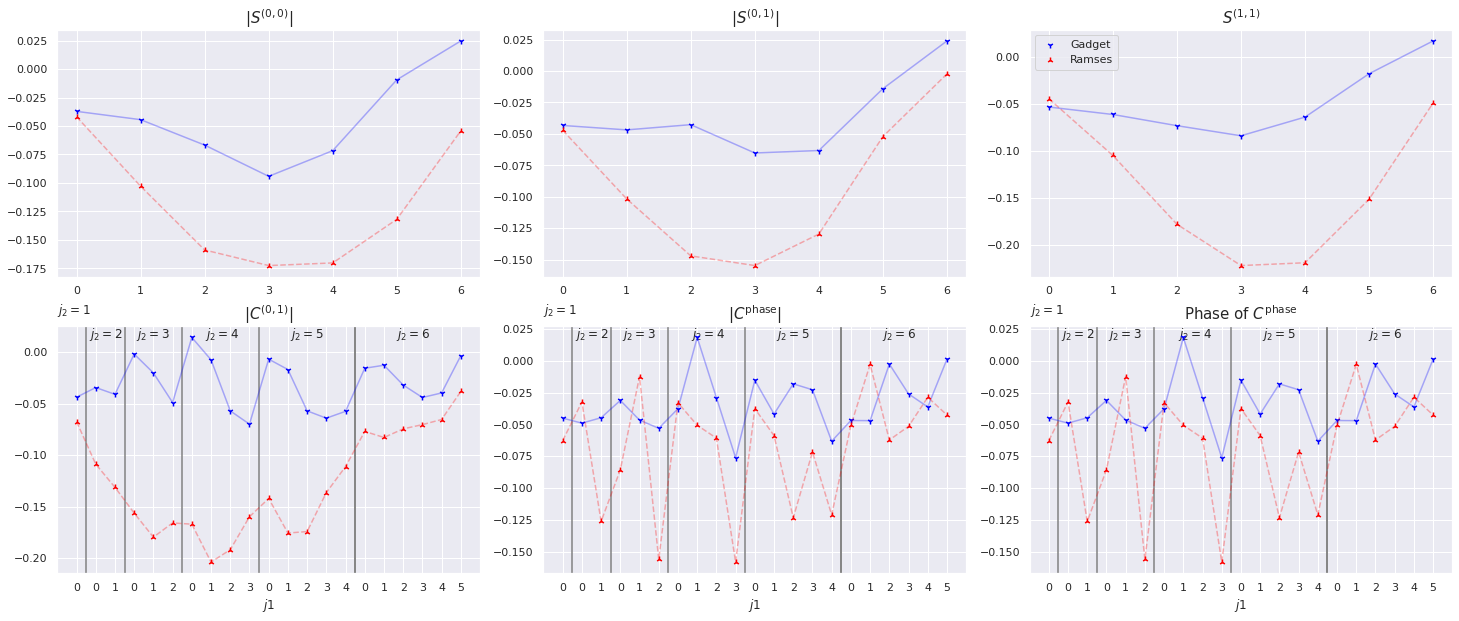

In [43]:
axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(25,10),wspace=0.15,hspace=0.2)
param=5
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = 'Times'
zorder = 10; alpha=0.3
titles = ["$|S^{(0,0)}|$","$|S^{(0,1)}|$","$S^{(1,1)}$","$|C^{(0,1)}|$","$|C^\mathrm{phase}|$",]
for i, name in enumerate(wph_tng.getCoefNames()):
    x = i % 3; y = i // 3
    # TNG
    X = np.absolute(tng_coefs[name][::15])
    r = getLinearCoef(X,tparams[:,param])
    axes[x,y].plot(range(X.shape[1]),r,c="blue",ls="-",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(range(X.shape[1]),r,c="blue",marker='1',zorder=zorder, label="Gadget")
    # SIMBA
    X = np.absolute(simba_coefs[name][::15])
    r = getLinearCoef(X,sparams[:,param])
    axes[x,y].plot(range(X.shape[1]),r,c="red",ls="--",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(range(X.shape[1]),r,c="red",marker='2',zorder=zorder, label="Ramses")
    axes[x,y].set_title(titles[i], fontsize=15)
axes[2,0].legend()
## Phase (angle of complex)
x=2;y=1;
# TNG
X = np.absolute(tng_coefs[name][::15])
r = getLinearCoef(X,tparams[:,param])
axes[x,y].plot(range(X.shape[1]),r,c="blue",ls="-",alpha=alpha,zorder=zorder)
axes[x,y].scatter(range(X.shape[1]),r,c="blue",marker='1',zorder=zorder)
# SIMBA
X = np.absolute(simba_coefs[name][::15])
r = getLinearCoef(X,sparams[:,param])
axes[x,y].plot(range(X.shape[1]),r,c="red",ls="--",alpha=alpha,zorder=zorder)
axes[x,y].scatter(range(X.shape[1]),r,c="red",marker='2',zorder=zorder)
axes[x,y].set_title("Phase of $C^\mathrm{phase}$", fontsize=15)

for i in range(3):
    j1  = [0.5, 2.5, 5.5, 9.5, 14.5,14.5]
    j2  = list(range(1,7))
    pos = [[0.0,1.1],[0.075,1.00],[0.185,1.00],
           [0.35,1.00],[0.55,1.00],[0.8,1.00]];
    for j, jj in enumerate(j1):
        axes[i,1].axvline(x=jj,c="grey",zorder=1)
        axes[i,1].text(*pos[j],"$j_2=${}".format(j2[j]),transform=axes[i,1].transAxes,
                       verticalalignment='top', horizontalalignment='left')
    axes[i,1].set_xticks(list(range(X.shape[1])))
    axes[i,1].set_xticklabels([0,0,1,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5])
    axes[i,1].set_xlabel("$j1$")   
#plt.savefig("linear_correlation.png",dpi=400)

## Mutual Information

In [5]:
mi_tng = np.load("./mutual_information/WPH_IllustrisTNG_J_7_L_4_dn_0.npy",allow_pickle=True).item()
mi_simba = np.load("./mutual_information/WPH_SIMBA_J_7_L_4_dn_0.npy",allow_pickle=True).item()

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times


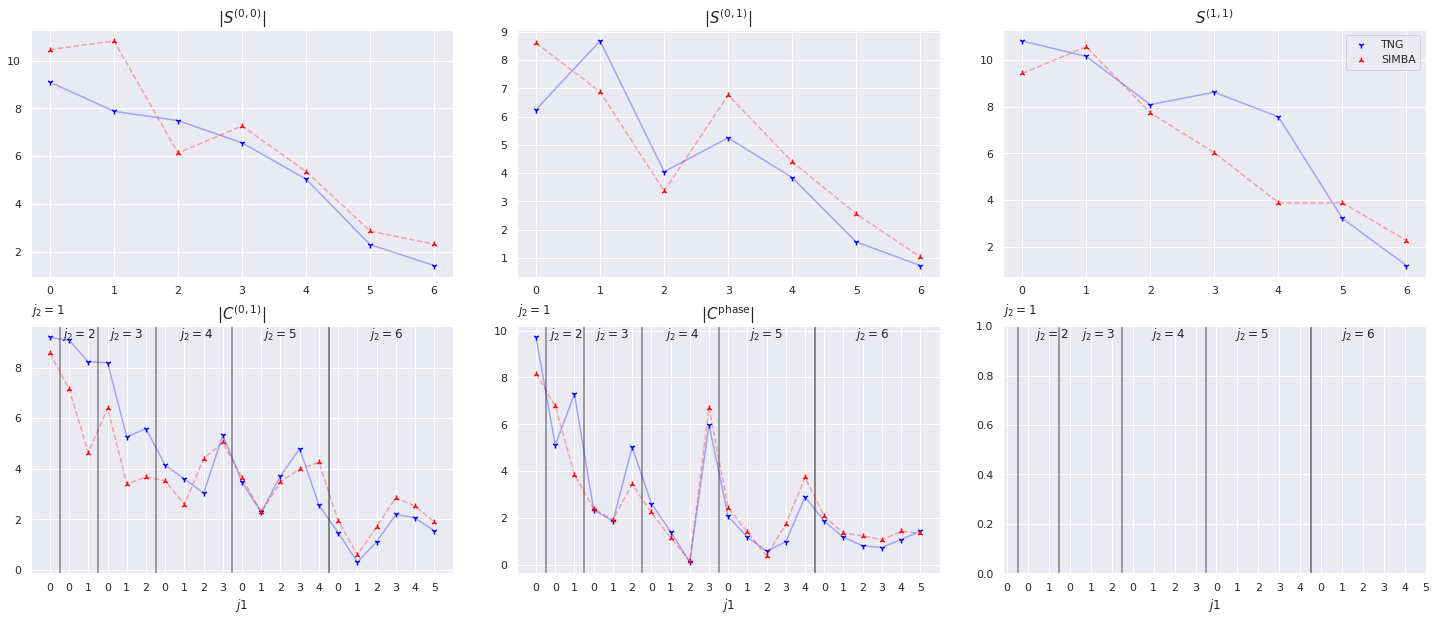

In [7]:
axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(25,10),wspace=0.15,hspace=0.2)
param=0

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = 'Times'
zorder = 10; alpha=0.3
titles = ["$|S^{(0,0)}|$","$|S^{(0,1)}|$","$S^{(1,1)}$","$|C^{(0,1)}|$","$|C^\mathrm{phase}|$","Phase of $C^\mathrm{phase}$"]
for i, name in enumerate(mi_tng.keys()):
    x = i % 3; y = i // 3
    # TNG
    X = range(mi_tng[name].shape[1])
    Y = mi_tng[name][param,:]
    axes[x,y].plot(X,Y,c="blue",ls="-",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(X,Y,c="blue",marker='1',zorder=zorder, label="TNG")
    # SIMBA
    X = range(mi_simba[name].shape[1])
    Y = mi_simba[name][param,:]
    axes[x,y].plot(X,Y,c="red",ls="--",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(X,Y,c="red",marker='2',zorder=zorder, label="SIMBA")
    axes[x,y].set_title(titles[i], fontsize=15)
axes[2,0].legend()


for i in range(3):
    j1  = [0.5, 2.5, 5.5, 9.5, 14.5,14.5]
    j2  = list(range(1,7))
    pos = [[0.0,1.1],[0.075,1.00],[0.185,1.00],
           [0.35,1.00],[0.55,1.00],[0.8,1.00]];
    for j, jj in enumerate(j1):
        axes[i,1].axvline(x=jj,c="grey",zorder=1)
        axes[i,1].text(*pos[j],"$j_2=${}".format(j2[j]),transform=axes[i,1].transAxes,
                       verticalalignment='top', horizontalalignment='left')
    axes[i,1].set_xticks(list(X))
    axes[i,1].set_xticklabels([0,0,1,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5])
    axes[i,1].set_xlabel("$j1$")   
#plt.savefig("linear_correlation.png",dpi=400)

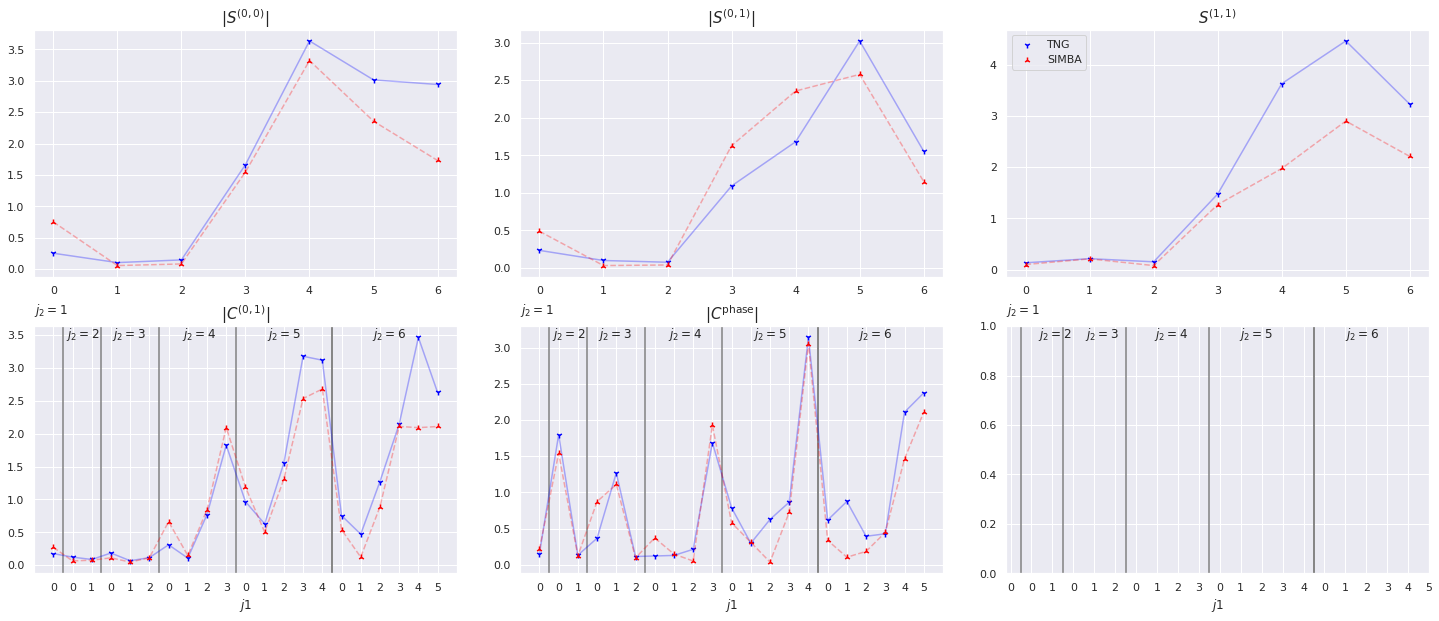

In [8]:
axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(25,10),wspace=0.15,hspace=0.2)
param=1

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = 'Times'
zorder = 10; alpha=0.3
titles = ["$|S^{(0,0)}|$","$|S^{(0,1)}|$","$S^{(1,1)}$","$|C^{(0,1)}|$","$|C^\mathrm{phase}|$","Phase of $C^\mathrm{phase}$"]
for i, name in enumerate(mi_tng.keys()):
    x = i % 3; y = i // 3
    # TNG
    X = range(mi_tng[name].shape[1])
    Y = mi_tng[name][param,:]
    axes[x,y].plot(X,Y,c="blue",ls="-",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(X,Y,c="blue",marker='1',zorder=zorder, label="TNG")
    # SIMBA
    X = range(mi_simba[name].shape[1])
    Y = mi_simba[name][param,:]
    axes[x,y].plot(X,Y,c="red",ls="--",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(X,Y,c="red",marker='2',zorder=zorder, label="SIMBA")
    axes[x,y].set_title(titles[i], fontsize=15)
axes[2,0].legend()


for i in range(3):
    j1  = [0.5, 2.5, 5.5, 9.5, 14.5,14.5]
    j2  = list(range(1,7))
    pos = [[0.0,1.1],[0.075,1.00],[0.185,1.00],
           [0.35,1.00],[0.55,1.00],[0.8,1.00]];
    for j, jj in enumerate(j1):
        axes[i,1].axvline(x=jj,c="grey",zorder=1)
        axes[i,1].text(*pos[j],"$j_2=${}".format(j2[j]),transform=axes[i,1].transAxes,
                       verticalalignment='top', horizontalalignment='left')
    axes[i,1].set_xticks(list(X))
    axes[i,1].set_xticklabels([0,0,1,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5])
    axes[i,1].set_xlabel("$j1$")   
#plt.savefig("linear_correlation.png",dpi=400)

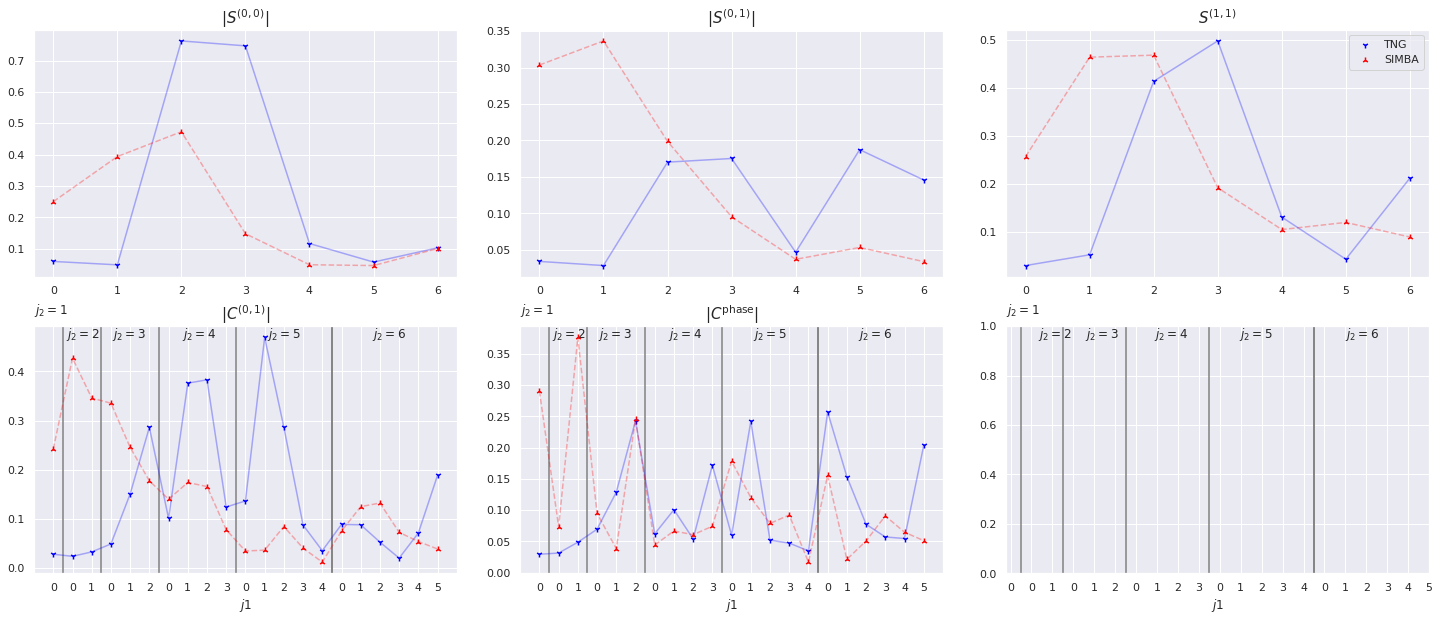

In [9]:
axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(25,10),wspace=0.15,hspace=0.2)
param=2

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = 'Times'
zorder = 10; alpha=0.3
titles = ["$|S^{(0,0)}|$","$|S^{(0,1)}|$","$S^{(1,1)}$","$|C^{(0,1)}|$","$|C^\mathrm{phase}|$","Phase of $C^\mathrm{phase}$"]
for i, name in enumerate(mi_tng.keys()):
    x = i % 3; y = i // 3
    # TNG
    X = range(mi_tng[name].shape[1])
    Y = mi_tng[name][param,:]
    axes[x,y].plot(X,Y,c="blue",ls="-",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(X,Y,c="blue",marker='1',zorder=zorder, label="TNG")
    # SIMBA
    X = range(mi_simba[name].shape[1])
    Y = mi_simba[name][param,:]
    axes[x,y].plot(X,Y,c="red",ls="--",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(X,Y,c="red",marker='2',zorder=zorder, label="SIMBA")
    axes[x,y].set_title(titles[i], fontsize=15)
axes[2,0].legend()


for i in range(3):
    j1  = [0.5, 2.5, 5.5, 9.5, 14.5,14.5]
    j2  = list(range(1,7))
    pos = [[0.0,1.1],[0.075,1.00],[0.185,1.00],
           [0.35,1.00],[0.55,1.00],[0.8,1.00]];
    for j, jj in enumerate(j1):
        axes[i,1].axvline(x=jj,c="grey",zorder=1)
        axes[i,1].text(*pos[j],"$j_2=${}".format(j2[j]),transform=axes[i,1].transAxes,
                       verticalalignment='top', horizontalalignment='left')
    axes[i,1].set_xticks(list(X))
    axes[i,1].set_xticklabels([0,0,1,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5])
    axes[i,1].set_xlabel("$j1$")   
#plt.savefig("linear_correlation.png",dpi=400)

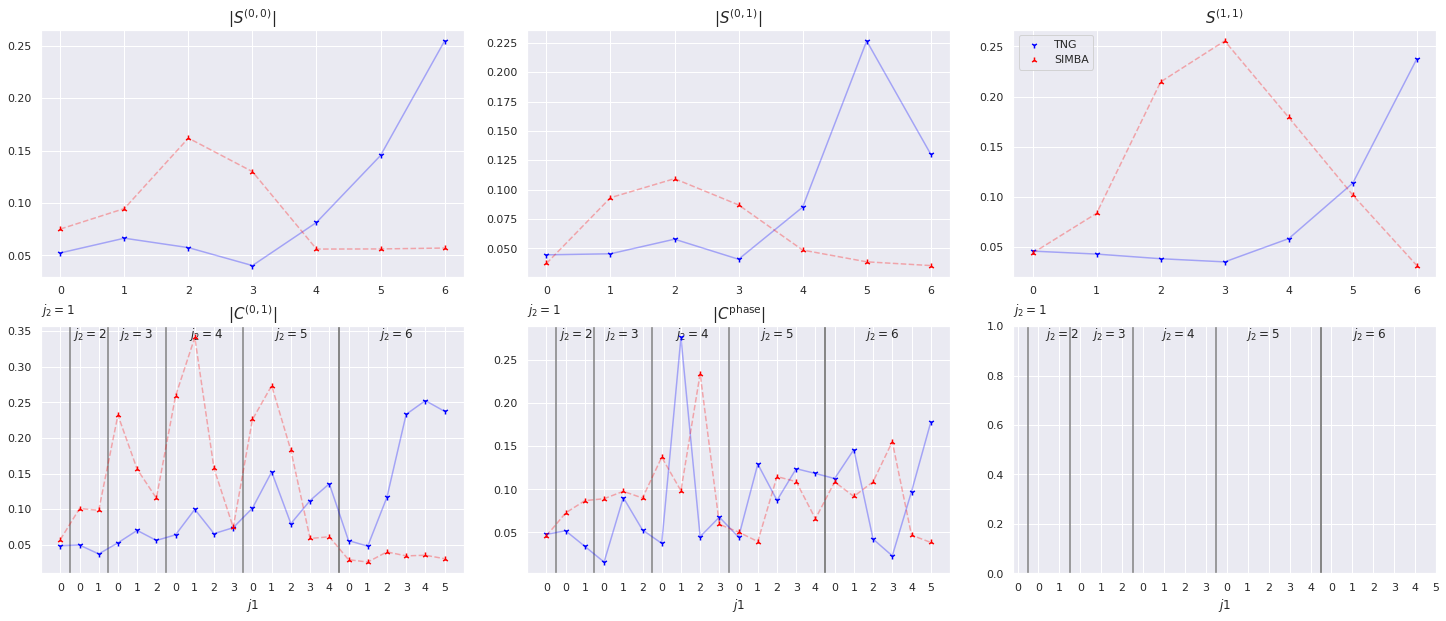

In [10]:
axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(25,10),wspace=0.15,hspace=0.2)
param=3

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = 'Times'
zorder = 10; alpha=0.3
titles = ["$|S^{(0,0)}|$","$|S^{(0,1)}|$","$S^{(1,1)}$","$|C^{(0,1)}|$","$|C^\mathrm{phase}|$","Phase of $C^\mathrm{phase}$"]
for i, name in enumerate(mi_tng.keys()):
    x = i % 3; y = i // 3
    # TNG
    X = range(mi_tng[name].shape[1])
    Y = mi_tng[name][param,:]
    axes[x,y].plot(X,Y,c="blue",ls="-",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(X,Y,c="blue",marker='1',zorder=zorder, label="TNG")
    # SIMBA
    X = range(mi_simba[name].shape[1])
    Y = mi_simba[name][param,:]
    axes[x,y].plot(X,Y,c="red",ls="--",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(X,Y,c="red",marker='2',zorder=zorder, label="SIMBA")
    axes[x,y].set_title(titles[i], fontsize=15)
axes[2,0].legend()


for i in range(3):
    j1  = [0.5, 2.5, 5.5, 9.5, 14.5,14.5]
    j2  = list(range(1,7))
    pos = [[0.0,1.1],[0.075,1.00],[0.185,1.00],
           [0.35,1.00],[0.55,1.00],[0.8,1.00]];
    for j, jj in enumerate(j1):
        axes[i,1].axvline(x=jj,c="grey",zorder=1)
        axes[i,1].text(*pos[j],"$j_2=${}".format(j2[j]),transform=axes[i,1].transAxes,
                       verticalalignment='top', horizontalalignment='left')
    axes[i,1].set_xticks(list(X))
    axes[i,1].set_xticklabels([0,0,1,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5])
    axes[i,1].set_xlabel("$j1$")   
#plt.savefig("linear_correlation.png",dpi=400)

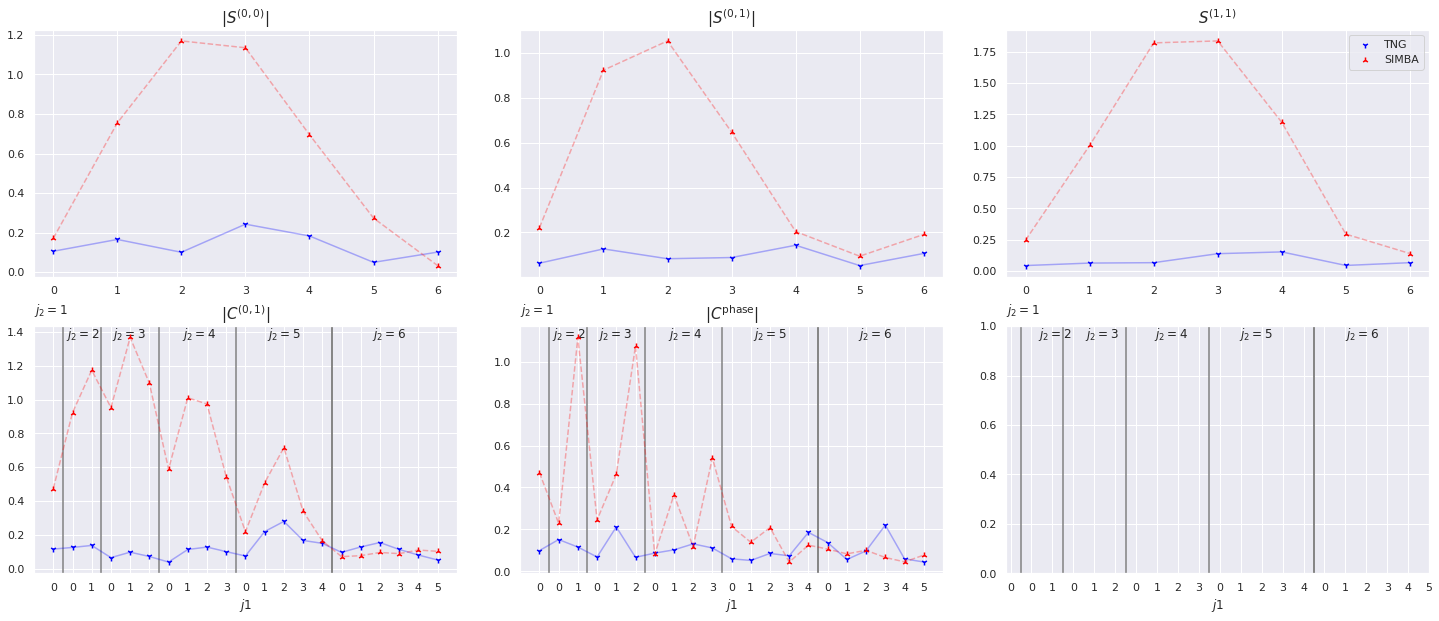

In [11]:
axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(25,10),wspace=0.15,hspace=0.2)
param=4

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = 'Times'
zorder = 10; alpha=0.3
titles = ["$|S^{(0,0)}|$","$|S^{(0,1)}|$","$S^{(1,1)}$","$|C^{(0,1)}|$","$|C^\mathrm{phase}|$","Phase of $C^\mathrm{phase}$"]
for i, name in enumerate(mi_tng.keys()):
    x = i % 3; y = i // 3
    # TNG
    X = range(mi_tng[name].shape[1])
    Y = mi_tng[name][param,:]
    axes[x,y].plot(X,Y,c="blue",ls="-",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(X,Y,c="blue",marker='1',zorder=zorder, label="TNG")
    # SIMBA
    X = range(mi_simba[name].shape[1])
    Y = mi_simba[name][param,:]
    axes[x,y].plot(X,Y,c="red",ls="--",alpha=alpha,zorder=zorder)
    axes[x,y].scatter(X,Y,c="red",marker='2',zorder=zorder, label="SIMBA")
    axes[x,y].set_title(titles[i], fontsize=15)
axes[2,0].legend()


for i in range(3):
    j1  = [0.5, 2.5, 5.5, 9.5, 14.5,14.5]
    j2  = list(range(1,7))
    pos = [[0.0,1.1],[0.075,1.00],[0.185,1.00],
           [0.35,1.00],[0.55,1.00],[0.8,1.00]];
    for j, jj in enumerate(j1):
        axes[i,1].axvline(x=jj,c="grey",zorder=1)
        axes[i,1].text(*pos[j],"$j_2=${}".format(j2[j]),transform=axes[i,1].transAxes,
                       verticalalignment='top', horizontalalignment='left')
    axes[i,1].set_xticks(list(X))
    axes[i,1].set_xticklabels([0,0,1,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5])
    axes[i,1].set_xlabel("$j1$")   
#plt.savefig("linear_correlation.png",dpi=400)